In [1]:
import pandas as pd
import random as rn
import numpy as np

# Визуализация
%matplotlib inline
import matplotlib.pyplot as plt

# модели
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Метрики
from sklearn.metrics import mean_squared_log_error, r2_score, root_mean_squared_log_error, mean_squared_error


In [2]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [11]:
# загрзка обучающего датасета
data_train = pd.read_csv("train.csv")

In [4]:
print(data_train.shape)

(30471, 292)


In [5]:
# отображение всех столбцов
pd.options.display.max_columns = 500

data_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

### Выбор столбцов (признаков) для обучения

price_doc: цена продажи (это целевая переменная)

full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения

life_sq: жилая площадь в квадратных метрах, за исключением лоджий, балконов и других нежилых помещений

floor: для квартир, этаж здания

max_floor: количество этажей в

material: материал стен

build_year: год постройки

num_room: количество жилых комнат

kitch_sq: площадь кухни

state: состояние квартиры 

product_type: покупка для частного использования или инвестиция

sub_area: название района

metro_km_walk:	Расстояние до метро

park_km:	Расстояние до парка

sadovoe_km:	Расстояние до Садового кольца

kremlin_km:	Расстояние до центра города (Кремля)

oil_chemistry_raion:	Наличие грязных производств

shopping_centers_raion:	Количество торговых центров в округе

healthcare_centers_raion:	Количество медицинских центров в округе

school_education_centers_raion:	Количество средних учебных заведений

In [41]:
# составление датафрейма
data_X = data_train[['full_sq',
                     'life_sq',
                     'floor',
                     'max_floor',
                     'material',            #продумать целесообразность использования
                     'build_year',
                     'num_room',
                     'kitch_sq',
                     'state',
                     'product_type',
                     'sub_area',
                     'metro_km_walk',
                     'park_km',
                     'sadovoe_km',
                     'kremlin_km',
                     'oil_chemistry_raion',
                     'shopping_centers_raion',
                     'healthcare_centers_raion',
                     'school_education_centers_raion']]
data_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,metro_km_walk,park_km,sadovoe_km,kremlin_km,oil_chemistry_raion,shopping_centers_raion,healthcare_centers_raion,school_education_centers_raion
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,1.131260,2.158587,13.100618,15.156211,no,16,1,5
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,0.635053,0.550690,6.444333,8.698054,no,3,1,8
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,1.445960,0.374848,6.963403,9.067885,no,0,1,7
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,0.963802,0.078090,17.457198,19.487005,no,11,1,10
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,0.688859,0.258289,0.046810,2.578671,no,10,4,9


In [42]:
numerical_cols = data_X.select_dtypes(include=['int64', 'float64']).columns
print("Числовые колонки:", numerical_cols)

categorical_cols = data_X.select_dtypes(include=['object', 'category']).columns
print("Категориальные колонки:", categorical_cols)

Числовые колонки: Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'metro_km_walk', 'park_km',
       'sadovoe_km', 'kremlin_km', 'shopping_centers_raion',
       'healthcare_centers_raion', 'school_education_centers_raion'],
      dtype='object')
Категориальные колонки: Index(['product_type', 'sub_area', 'oil_chemistry_raion'], dtype='object')


In [43]:
# удаление объектов
data_X = data_X.drop(['product_type', 'sub_area', 'oil_chemistry_raion'], axis=1)
data_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,metro_km_walk,park_km,sadovoe_km,kremlin_km,shopping_centers_raion,healthcare_centers_raion,school_education_centers_raion
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.131260,2.158587,13.100618,15.156211,16,1,5
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.635053,0.550690,6.444333,8.698054,3,1,8
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.445960,0.374848,6.963403,9.067885,0,1,7
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.963802,0.078090,17.457198,19.487005,11,1,10
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.688859,0.258289,0.046810,2.578671,10,4,9


In [8]:
#np.object = object
#data_X.loc[:,data_X.dtypes==np.object].columns.to_list()

In [31]:
# удаление из полного файла, пока не брать
pd.options.display.max_columns = 500

data_X = data_train.drop(['timestamp',
                      'product_type',
                      'sub_area',
                      'culture_objects_top_25',
                      'thermal_power_plant_raion',
                      'incineration_raion',
                      'oil_chemistry_raion',
                      'radiation_raion',
                      'railroad_terminal_raion',
                      'big_market_raion',
                      'nuclear_reactor_raion',
                      'detention_facility_raion',
                      'water_1line',
                      'big_road1_1line',
                      'railroad_1line',
                      'ecology',
                      'price_doc'], axis=1)     #удаляем правильные ответы


In [44]:
# подсчет сколько пропущенных значений
data_X.isnull().sum()

full_sq                               0
life_sq                            6383
floor                               167
max_floor                          9572
material                           9572
build_year                        13605
num_room                           9572
kitch_sq                           9572
state                             13559
metro_km_walk                        25
park_km                               0
sadovoe_km                            0
kremlin_km                            0
shopping_centers_raion                0
healthcare_centers_raion              0
school_education_centers_raion        0
dtype: int64

In [ ]:
data_X = data_X[['life_sq',
                 'floor',
                 'max_floor',
                 'material',
                 'build_year',
                 'num_room',
                 'kitch_sq',
                 'state',
                 'metro_km_walk']] = data_X[['life_sq',
                                             'floor',
                                             'max_floor',
                                             'material',
                                             'build_year',
                                             'num_room',
                                             'kitch_sq',
                                             'state',
                                             'metro_km_walk']].fillna(df[['rating', 'points']].mean())

In [45]:
data_X = data_X.fillna(data_X.median())

In [46]:
data_X.isnull().sum()

full_sq                           0
life_sq                           0
floor                             0
max_floor                         0
material                          0
build_year                        0
num_room                          0
kitch_sq                          0
state                             0
metro_km_walk                     0
park_km                           0
sadovoe_km                        0
kremlin_km                        0
shopping_centers_raion            0
healthcare_centers_raion          0
school_education_centers_raion    0
dtype: int64

In [47]:
data_X

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,metro_km_walk,park_km,sadovoe_km,kremlin_km,shopping_centers_raion,healthcare_centers_raion,school_education_centers_raion
0,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,1.131260,2.158587,13.100618,15.156211,16,1,5
1,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,0.635053,0.550690,6.444333,8.698054,3,1,8
2,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,1.445960,0.374848,6.963403,9.067885,0,1,7
3,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,0.963802,0.078090,17.457198,19.487005,11,1,10
4,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,0.688859,0.258289,0.046810,2.578671,10,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,0.679841,1.972527,10.543724,12.599292,9,1,4
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,0.781217,1.036452,1.203215,3.269284,23,3,4
30468,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,1.0,1.722233,4.566595,19.868997,21.905792,1,0,0
30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,2.047312,1.772506,11.752036,13.622569,4,2,8


In [48]:
data_X[data_X == 0].count()

full_sq                               2
life_sq                              45
floor                                 9
max_floor                           550
material                              0
build_year                          530
num_room                             14
kitch_sq                           1381
state                                 0
metro_km_walk                         1
park_km                               0
sadovoe_km                            0
kremlin_km                            0
shopping_centers_raion             7471
healthcare_centers_raion          12842
school_education_centers_raion     6685
dtype: int64

In [49]:
# загрузка правильных ответов
data_y = pd.DataFrame()
data_y['price_doc'] = data_train['price_doc']

In [52]:
data_y.astype(float)

,price_doc
0,5850000.0
1,6000000.0
2,5700000.0
3,13100000.0
4,16331452.0
...,...
30466,7400000.0
30467,25000000.0
30468,6970959.0
30469,13500000.0


In [61]:
data_X.build_year.dtype

dtype('float64')

In [25]:
data_y.price_doc.info()
data_X.build_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30471 entries, 0 to 30470
Series name: price_doc
Non-Null Count  Dtype
--------------  -----
30471 non-null  int64
dtypes: int64(1)
memory usage: 238.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 30471 entries, 0 to 30470
Series name: build_year
Non-Null Count  Dtype  
--------------  -----  
16866 non-null  float64
dtypes: float64(1)
memory usage: 238.2 KB


In [62]:
# разделяем на обучающую выборку и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, shuffle=False, random_state=42)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21329, 16), (9142, 16), (21329, 1), (9142, 1))

In [67]:
data_X.build_year.astype(int)

0        1979
1        1979
2        1979
3        1979
4        1979
         ... 
30466    1975
30467    1935
30468    1979
30469    2003
30470    1968
Name: build_year, Length: 30471, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

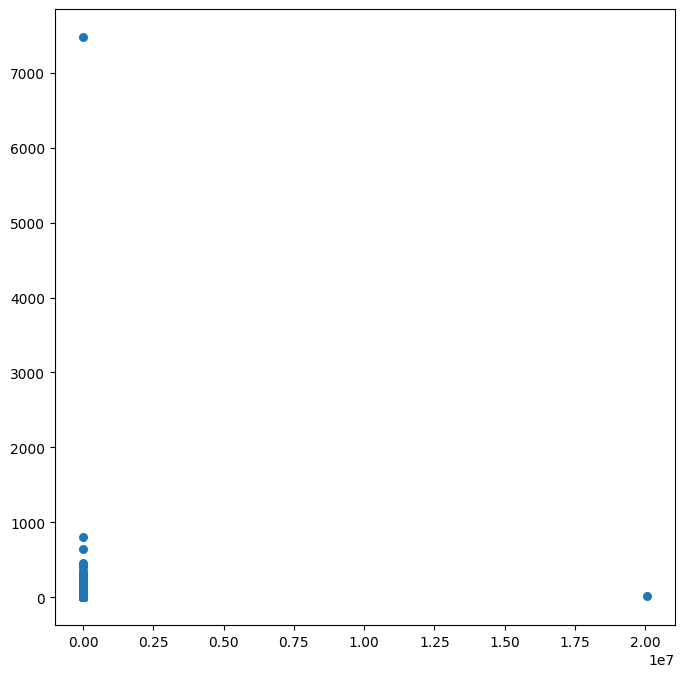

In [69]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X['build_year'], data_X['life_sq'], s=30)
plt.show

In [70]:
%%time

# обучаем модель с помощью дерева решений
clf = DecisionTreeRegressor(max_depth=3,min_samples_leaf=15)
clf.fit(X_train, y_train)

# получаем предсказания
predicted = clf.predict(X_test)

# выводим RMSLE
print('RMSLE: ', mean_squared_log_error(y_test,predicted, squared=False))
print('r2', r2_score(y_test, predicted))
print('MSE', mean_squared_error(y_test,predicted))

RMSLE:  0.4946049996510067
r2 0.4881060662042036
MSE 14165279749972.129
CPU times: total: 46.9 ms
Wall time: 48.2 ms


c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


In [ ]:
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')